In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
test = pd.read_csv('/users/yewzzang/work/make_mc_vertex/analysis/jsns2_0920_100k_10E_mc.csv')
# test = pd.read_csv('/users/yewzzang/work/make_mc_vertex/analysis/202211101_model60_10000_1024_k10.csv')
# test = pd.read_csv('/users/yewzzang/work/make_mc_vertex/analysis/sphere_0920_100k_10E_mc.csv')

In [3]:
f = np.array(test)

In [4]:
vtx = f[:,10:13]

In [5]:
ff = pd.read_csv('jsns_geometry_pos.csv',header=0)
# ff = pd.read_csv('jsns_geometry_pos2.csv',header=0)
# ff = pd.read_csv('cylinder_geometry_pos.csv',header=0)
# ff = pd.read_csv('sphere_geometry_pos.csv',header=0)

In [6]:
len(ff)
pmt_charge = f[:,17:17+len(ff)]
pmt_charge_max =(np.array(f)[:,17:17+len(ff)]/(np.repeat(np.max(np.array(f)[:,17:17+len(ff)],axis=1),len(ff)).reshape(-1,len(ff))))

In [7]:
### R2
diff = vtx.reshape(-1,1,3) - np.array(ff)/1000
diff2 = diff[:,:,0]*diff[:,:,0]+diff[:,:,1]*diff[:,:,1]+diff[:,:,2]*diff[:,:,2]

In [8]:
combined = np.concatenate([pmt_charge.reshape(-1,len(ff),1),diff2.reshape(-1,len(ff),1)],axis=2)
combined.shape


(99238, 96, 2)

In [9]:
pmt_charge_max.shape

(99238, 96)

In [10]:
combined2 = np.concatenate([pmt_charge_max.reshape(-1,len(ff),1),diff2.reshape(-1,len(ff),1)],axis=2)

In [11]:
# for i in range(1000):
#     print(len(pmt_charge[i])==0)

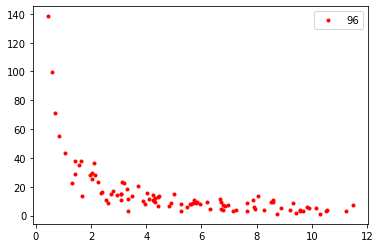

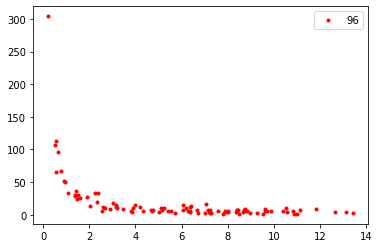

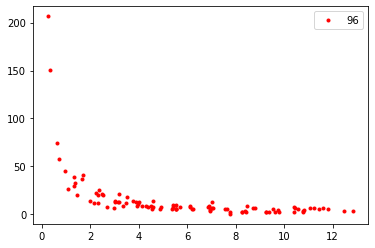

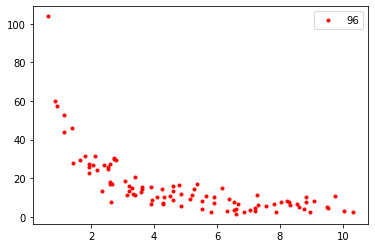

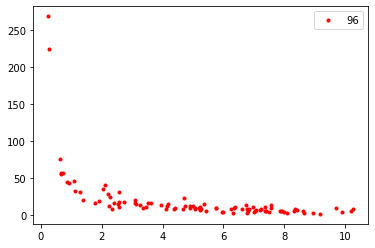

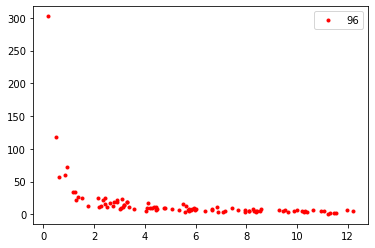

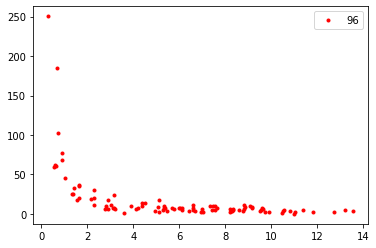

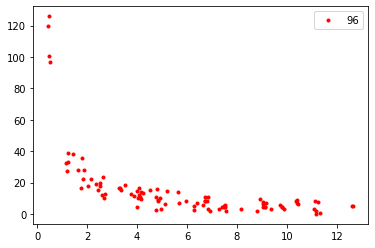

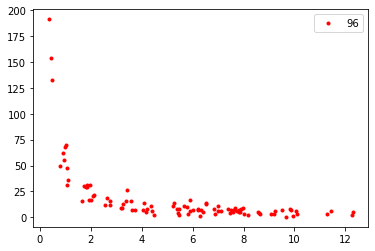

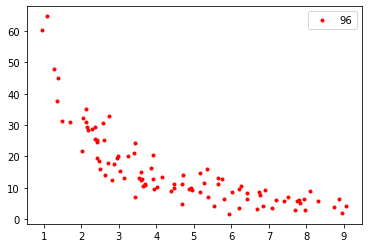

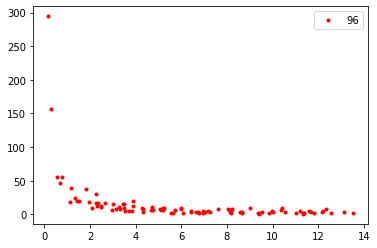

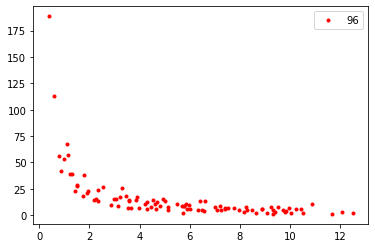

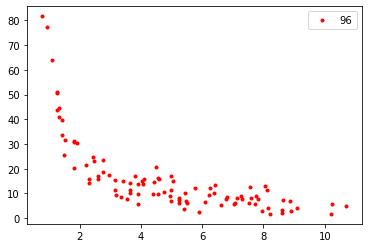

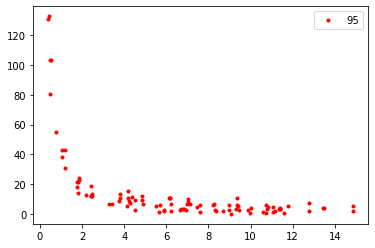

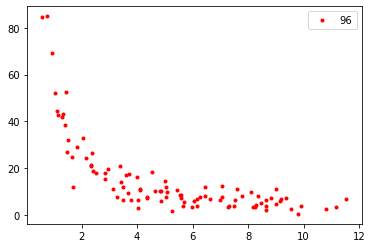

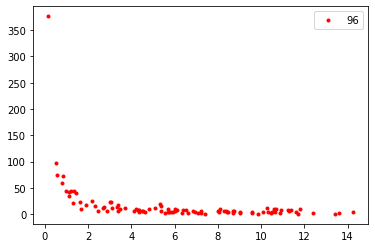

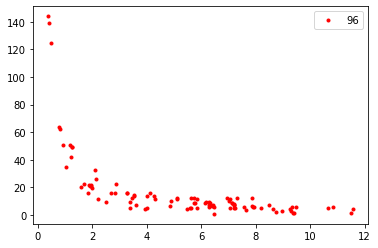

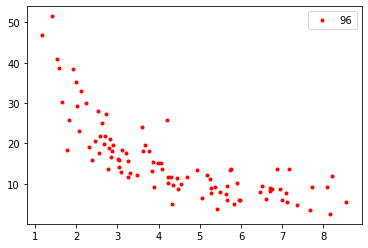

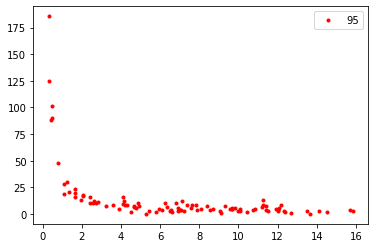

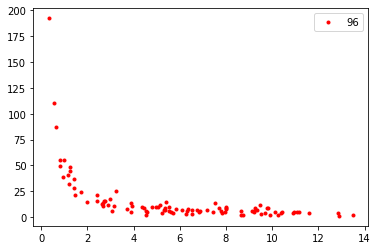

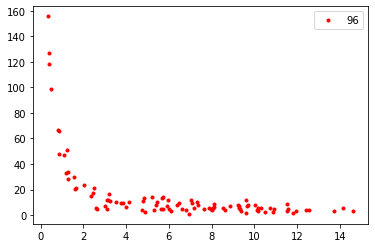

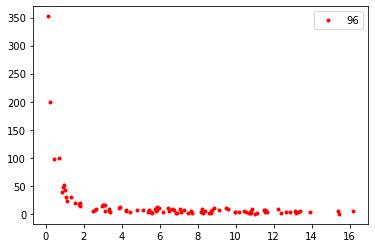

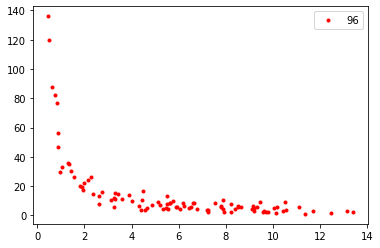

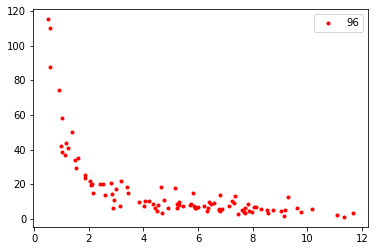

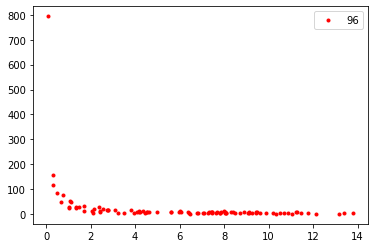

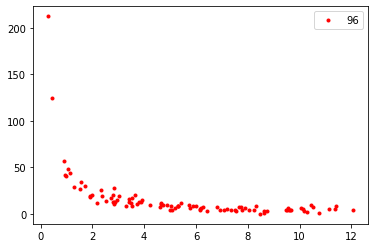

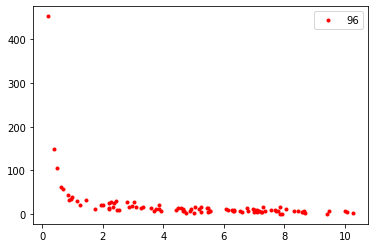

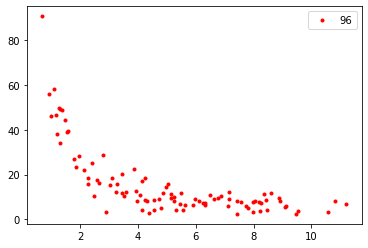

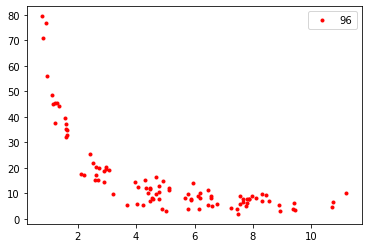

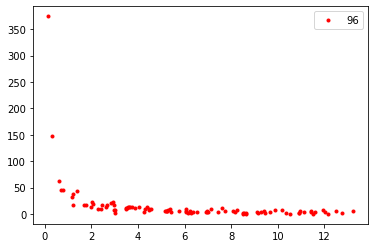

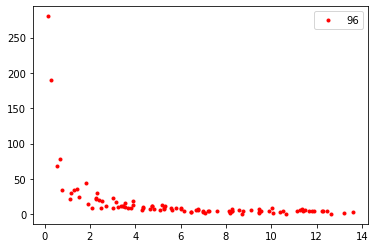

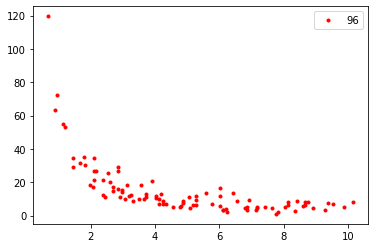

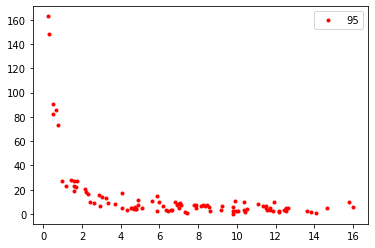

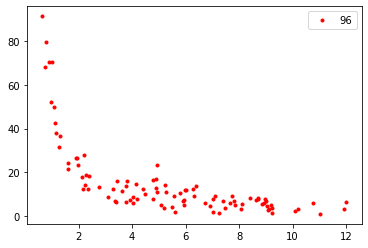

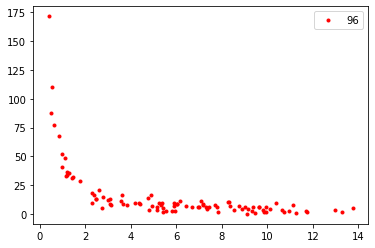

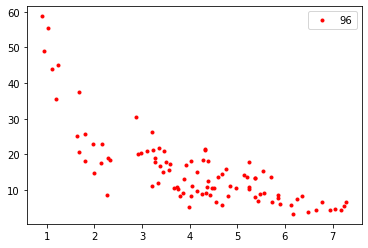

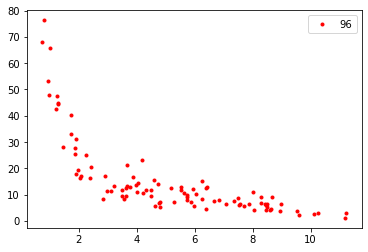

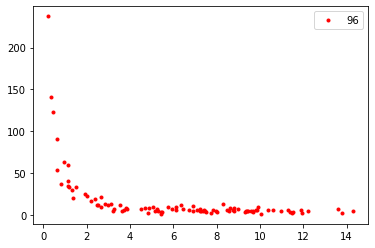

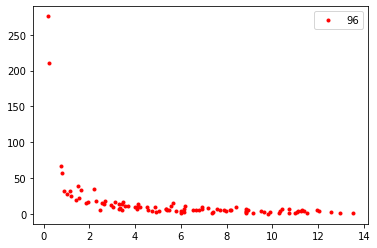

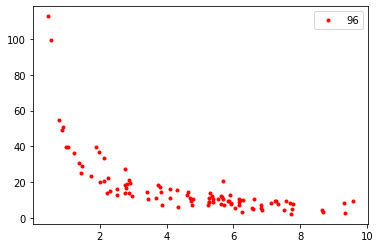

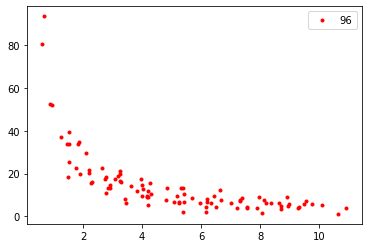

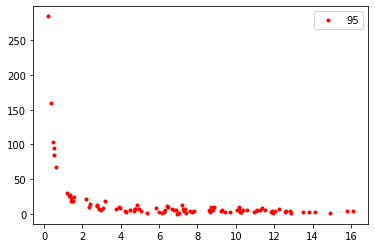

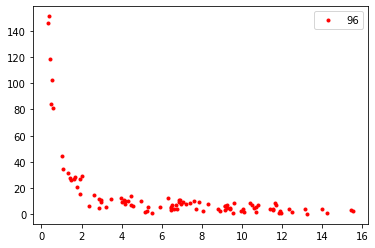

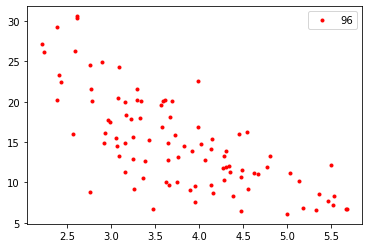

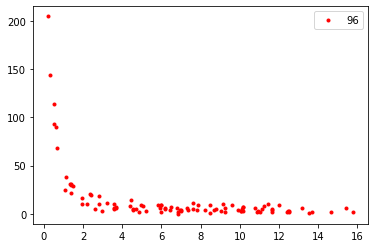

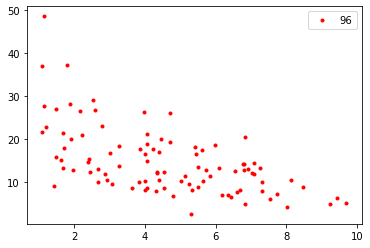

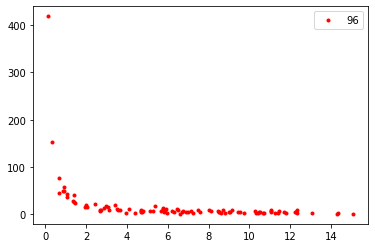

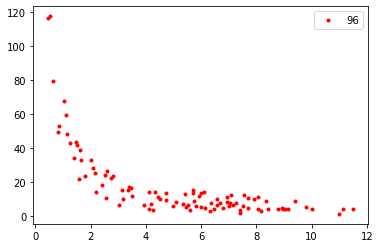

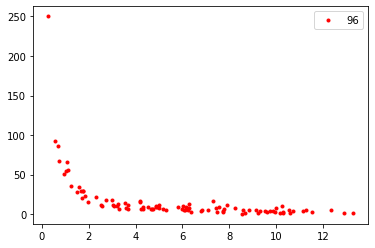

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [12]:
for i in range(1000):
#     plt.plot(combined[i,:,1][combined[i,:,1]<2],combined[i,:,0][combined[i,:,1]<2],'.r')
    plt.plot(combined[i,:,1],combined[i,:,0],'.r',label=str(len(ff)-len(combined[i,:,0][combined[i,:,0] == 0])))
#     plt.plot(combined2[i,:,1],combined2[i,:,0],'.b',label=str(len(ff)-len(combined2[i,:,0][combined2[i,:,0] == 0])))
    plt.legend(loc='best')
    plt.show()